<a href="https://colab.research.google.com/github/korsunkon/demos/blob/master/NLP_Disaster_tweets%20Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task:FROM KAGGLE: build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd

In [0]:
from fastai.text import *

In [0]:
#load data from kaggle
df=pd.read_csv('/content/train (1).csv')

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
#Get rid of keyword and location columns we wont use it
df=df.drop(columns={'keyword','location'})

In [8]:
df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
#We have 16 Gigs of GPU ram,so we can use bathsize of 64
bs=64

In [10]:
#Create data bunch from df(tokenization and numerization also)
data = (TextList.from_df(df, cols='text')
                .split_by_rand_pct(0.1)
                .label_from_df(cols=2)
                 .databunch(bs=bs))

In [11]:
data.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup r. xxup curfew xxup in xxup xxunk xxup until xxunk xxup xxunk xxup xxunk xxup foxtrot 5 & & xxup foxtrot 6 xxup xxunk . xxup xxunk : xxunk / 5 . xxup exp xxup xxunk xxup xxunk . xxup xxunk 05 . xxup xxunk . xxup xxunk : 10 . xxup xxunk : xxunk .,0
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,0


In [12]:
# vocabulary of our dataset
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '/']

In [0]:
#Load test data from Kaggle
df_test=pd.read_csv('/content/test (1).csv')

In [0]:
df_test=df_test.drop(columns={'keyword','location'})

In [15]:
df_test.describe

<bound method NDFrame.describe of          id                                               text
0         0                 Just happened a terrible car crash
1         2  Heard about #earthquake is different cities, s...
2         3  there is a forest fire at spot pond, geese are...
3         9           Apocalypse lighting. #Spokane #wildfires
4        11      Typhoon Soudelor kills 28 in China and Taiwan
...     ...                                                ...
3258  10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259  10865  Storm in RI worse than last hurricane. My city...
3260  10868  Green Line derailment in Chicago http://t.co/U...
3261  10874  MEG issues Hazardous Weather Outlook (HWO) htt...
3262  10875  #CityofCalgary has activated its Municipal Eme...

[3263 rows x 2 columns]>

In [0]:
#For language model we will combine texts from test and train df's to traim model better,we wont use labels
lm_data=pd.concat([df,df_test])

In [17]:
lm_data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,Forest fire near La Ronge Sask. Canada,1.0
2,5,All residents asked to 'shelter in place' are ...,1.0
3,6,"13,000 people receive #wildfires evacuation or...",1.0
4,7,Just got sent this photo from Ruby #Alaska as ...,1.0


**CREATE LANGUAGE MODEL**

In [19]:
#Create data bunch for language model
data_lm = (TextList.from_df(lm_data,cols='text')
             .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [21]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,xxup compliant | ebay http : / / t.co / xxunk xxbos xxmaj new xxmaj xxunk xxmaj device xxmaj will xxmaj be xxmaj able xxmaj to xxmaj target xxmaj and xxmaj destroy xxmaj blood xxmaj xxunk http : / / t.co / xxunk xxbos xxunk xxunk xxup xxunk xxunk it was xxunk crazy 3 fights an ambulance and a couple xxunk pits ? ? xxbos xxmaj if i get run
2,t.co / o91f3cyy0r xxunk xxbos xxmaj one xxmaj direction xxmaj is my pick for http : / / t.co / q2eblokeve xxmaj fan xxmaj army # xxmaj directioners http : / / t.co / encmhz6y34 xxunk xxbos 5 xxmaj seconds of xxmaj summer xxmaj is my pick for http : / / t.co / xxunk xxmaj fan xxmaj army # xxup 5sosfam http : / / t.co / xxunk xxbos
3,israeli xxmaj flag via xxmaj pamela xxmaj geller - ... http : / / t.co / xxunk xxbos # xxunk # xxunk xxmaj avalanche xxmaj defense : xxmaj how xxmaj they xxmaj match vs xxmaj st. xxmaj louis xxmaj xxunk http : / / t.co / xxunk # xxunk xxbos i liked a @youtube video http : / / t.co / xxunk xxmaj kalle xxmaj mattson - ' xxmaj avalanche
4,xxup ms xxrep 5 + xxmaj high grade ! - xxmaj full read xxup û _ http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxmaj this bowl got me thinking ... xxmaj damn i 've been blazing for so damn long xxbos xxunk xxunk xxmaj he 's blazing through this game with the best xxunk skills yet . xxmaj nothing beats the xxunk


In [22]:
#Download learner
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


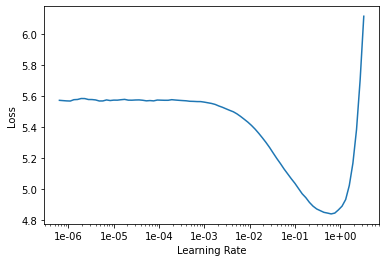

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(1, 1e-1, )

epoch,train_loss,valid_loss,accuracy,time
0,3.867373,3.356459,0.439541,00:19


In [0]:
#experiments with learnin rate
learn.save('fine_tuned')

In [0]:
learn.unfreeze()

In [28]:
learn.fit_one_cycle(10, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,3.186277,3.088462,0.466932,00:24
1,3.289442,3.570095,0.404464,00:24
2,4.893770,5.482790,0.206282,00:24
3,5.310357,5.187907,0.230517,00:24
4,5.366123,5.125117,0.229241,00:24
5,5.328200,5.042737,0.247353,00:24
6,5.262797,4.975731,0.233546,00:24
7,5.216143,4.969510,0.234088,00:24
8,5.180745,4.950521,0.248693,00:24
9,5.162902,4.948079,0.248788,00:24


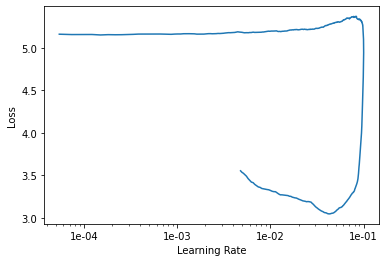

In [29]:
learn.recorder.plot()

In [30]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (9789 items)
x: LMTextList
xxbos xxmaj our xxmaj xxunk are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1087 items)
x: LMTextList
xxbos xxup sandstorm ! ! ! xxup xxunk xxup xxunk ! !,xxbos xxmaj quality xxmaj xxunk xxmaj penalties xxmaj may xxmaj harm xxmaj patient xxmaj care xxunk xxmaj say - xxmaj primary care xxunk xxunk hold positive xxunk ... http : / / t.co / xxunk,xxbos xxunk _ xxunk xxmaj hello 911 yeah we have someone drowning 

In [0]:
learn.unfreeze()

In [32]:
learn.fit_one_cycle(9, max_lr=slice(1e-2,1e-1) )

epoch,train_loss,valid_loss,accuracy,time
0,3.024656,3.014406,0.476499,00:24
1,2.970724,3.178574,0.458642,00:24
2,3.074707,3.211370,0.455166,00:24
3,3.025636,3.122860,0.471365,00:24
4,2.862859,3.080758,0.476690,00:24
5,2.648117,3.060178,0.486607,00:24
6,2.302583,3.081873,0.495089,00:24
7,1.897455,3.199287,0.497545,00:24
8,1.596263,3.277387,0.497162,00:24


In [0]:
learn.save('fine_tuned')

In [0]:
# TEST How our LM works
TEXT = "Bomb detonated"
N_WORDS = 40
N_SENTENCES = 2

In [35]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Bomb detonated a bomb train that derailed was at Smithsonian ? xxbos The Hobbit : The Desolation of Smaug ( via Cover ) http : / / t.co / QEW4C5M1XD View and download
Bomb detonated a mass - murderer and a hatchet than a monster BOMB . We will become a big problem in your own words ???? xxbosxxbosxxbosxxbos Swansea ? plot hijack transfer move for Southampton target


In [0]:
TEXT = "Lord forgive us"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

In [0]:
learn.save_encoder('fine_tuned_enc')

**CREATE CLASSIFIER**

In [0]:
#Create train and validatin set
train=df[:8000]
val=df[2000:]
test=df_test

In [39]:
#Create data class. 
target_cols=['target']
cols=['text']
data_clas = TextClasDataBunch.from_df('.', train, val, test,
                  vocab=data_lm.vocab,
                  text_cols=cols,
                  label_cols=target_cols,
                  bs=32)

In [40]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0
xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,1
xxbos xxmaj learn xxmaj how i xxmaj gained xxmaj access xxmaj to xxmaj the xxmaj secrets xxmaj of xxmaj the xxmaj top xxmaj earners & & xxmaj used xxmaj them xxmaj to xxmaj explode xxmaj my xxmaj home xxmaj business xxmaj here : http : / / t.co / xxunk xxmaj please # xxup rt,0


In [43]:
#Create text classifier, also use previosly created encoder
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7613 items)
x: TextList
xxbos xxmaj our xxmaj xxunk are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (5613 items)
x: TextList
xxbos xxunk the saw is fast af and does great damage i xxunk it a xxunk and used it xxunk for a whole xxunk,xxbos xxmaj let 's say a tree falls on your xxunk . xxmaj do you know how your homeowners insurance may help ? http : / / t.co / xxunk http : / / t.co / xxunk,xxbos xxunk xxup xxunk for a xxup xxunk situ

In [44]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


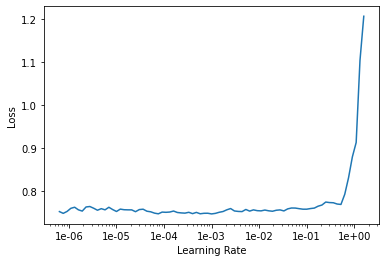

In [45]:
learn.recorder.plot()

In [46]:
#Experiments with learning rate
learn.fit_one_cycle(9, max_lr=slice(1e-2,1e-1) )

epoch,train_loss,valid_loss,accuracy,time
0,0.684759,0.677535,0.569393,00:19
1,0.700499,0.703897,0.551577,00:18
2,0.728504,0.747355,0.448423,00:18
3,0.711993,0.687195,0.535364,00:19
4,0.716777,0.697486,0.551577,00:20
5,0.699035,0.690830,0.551577,00:18
6,0.680070,0.675274,0.551577,00:18
7,0.674750,0.657771,0.636914,00:19
8,0.675231,0.666511,0.551577,00:18


In [0]:
learn.save('first')

In [48]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.667936,0.639159,0.645110,00:21


In [0]:
learn.save('second')

In [50]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.660793,0.625389,0.664351,00:30


In [0]:
learn.save('third')

In [52]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.620006,0.599340,0.675396,00:38
1,0.582495,0.536223,0.741493,00:36


In [0]:
#learn.export('/twitter.pkl')

In [0]:
#load_learner('/export.pkl')


In [56]:
#Predictions using our model
preds_test, target_test = learn.get_preds(DatasetType.Test, ordered=True)
y = torch.argmax(preds_test, dim=1)
y.numpy().shape

(3263,)

In [60]:
submission=pd.read_csv('/content/sample_submission (2).csv')
print(submission.shape)

(3263, 2)


In [61]:
submission['target']=y.numpy()
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [0]:
submission.to_csv('submission-fastai.csv', index=False)